# **Import Libraries**


In [147]:
import pandas as pd
#open source data analysis and manipulation tool
import nltk
# Natural Language Toolkit
import seaborn as sns 
#Library for diagrams
import numpy as np
#library for arrays
from textblob import TextBlob
#Library for processing textual data
import re as regex
import re
nltk.download('punkt')  
# Natural Language Toolkit
from collections import Counter
# sklearn library for train-test,accuracy-recall-precision score and time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# time library for calculate time
from time import time
#precision, recall and and accuracy score from sklearn.metrics libraty  
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Input Files (Data)**

In [148]:
#Read .csv files into train and test data with the right encoding!
train_data = pd.read_csv('/content/TwitterTrain.csv', encoding= 'unicode_escape')
test_data = pd.read_csv('/content/TwitterTest.csv', encoding= 'unicode_escape')





train_data = train_data[train_data['target'] != 'text']

In [149]:
# Analyze the 1st 5 posts of train_data file
train_data.head() 

,ids,text,target
0,2329170131,why am tipsy at 1:30 in the afternoon. Thanks ...,0
1,2329170276,why am tipsy at 1:30 in the afternoon. Thanks ...,0
2,2329170385,has a feeling the rest of the day is going to ...,0
3,2329170393,@JapanNewbie woohoo I'm all for slack time.. I...,0
4,2329170631,Scratch that.. No pool today,0


In [150]:
# Info for the train_data file
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ids     2017 non-null   int64 
 1   text    2017 non-null   object
 2   target  2017 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 63.0+ KB


In [151]:
# Analyze the 1st 5 posts of test_data file
test_data.head()

,ids,text,target
0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,is upset that he can't update his Facebook by ...,0
2,1467810917,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,my whole body feels itchy and like its on fire,0
4,1467811193,"@nationwideclass no, it's not behaving at all....",0


In [152]:
# Info for the test_data file
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ids     204 non-null    int64 
 1   text    204 non-null    object
 2   target  204 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.9+ KB


# **Data Visualization**

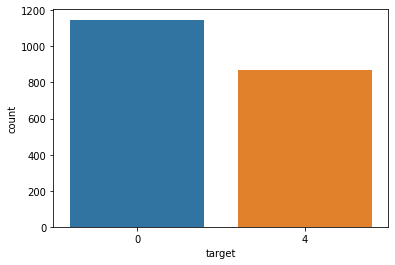

In [153]:
# Diagram of the train_data file with number of posts and negantive files
sns.countplot(x='target',data=train_data)

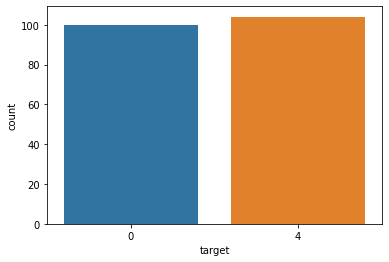

In [154]:
sns.countplot(x='target',data=test_data)

# **Remove Empty Tweets**

In [155]:
# remove tweets with empty sentiment column

train_data = train_data[train_data['target'] != ""]



In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ids     2017 non-null   int64 
 1   text    2017 non-null   object
 2   target  2017 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 63.0+ KB


# **Tweet Cleaning**

In [121]:


 #Function to clean tweets
 #Remove URLs
 #Remove usernames (mentions)
 #Remove special characters EXCEPT FROM :,)
 #Remove Numbers 



def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)

     # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    
    
    
    
    return tweet



In [158]:
# Apply function to Text column with clean text
train_data['text'] = train_data['text'].apply(clean_tweets)


In [159]:
#Analyze the 1st 5 posts of train_data file after cleaning with Name of column and datatype!
train_data['text'].head()

0    why am tipsy at  in the afternoon Thanks There...
1    why am tipsy at  in the afternoon Thanks There...
2    has a feeling the rest of the day is going to ...
3    woohoo Im all for slack time Im goin crazy at ...
4                          Scratch that No pool today 
Name: text, dtype: object

# **Tokenize & Stremming**

In [160]:
# Function which directly tokenize the text data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
train_data['text'].apply(tt.tokenize)

0       [why, am, tipsy, at, in, the, afternoon, Thank...
1       [why, am, tipsy, at, in, the, afternoon, Thank...
2       [has, a, feeling, the, rest, of, the, day, is,...
3       [woohoo, Im, all, for, slack, time, Im, goin, ...
4                        [Scratch, that, No, pool, today]
                              ...                        
2012    [Pretty, good, coaching, with, exceptional, ta...
2013                                  [I, hate, Tuesdays]
2014        [its, her, quothairquot, I, cant, deal, with]
2015    [Feel, like, Im, stuck, in, a, rut, Waiting, t...
2016       [i, need, new, glassesmines, is, hangnon, arm]
Name: text, Length: 2017, dtype: object

In [161]:
from nltk.stem import PorterStemmer   #Libraries for tokenize words and stremming
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [162]:
def tokenize(text):                    # funtion for tokenize words and stremming
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

In [163]:
# apply tokenize function
train_data['tokenized'] = train_data['text'].apply(tokenize)

In [164]:
# apply stemming function
train_data['stremming'] = train_data['tokenized'].apply(stemming)

In [165]:
train_data.head()  #See the 1st 5 tokenize reults

,ids,text,target,tokenized,stremming
0,2329170131,why am tipsy at in the afternoon Thanks There...,0,"[why, am, tipsy, at, in, the, afternoon, Thank...","[whi, am, tipsi, at, in, the, afternoon, thank..."
1,2329170276,why am tipsy at in the afternoon Thanks There...,0,"[why, am, tipsy, at, in, the, afternoon, Thank...","[whi, am, tipsi, at, in, the, afternoon, thank..."
2,2329170385,has a feeling the rest of the day is going to ...,0,"[has, a, feeling, the, rest, of, the, day, is,...","[ha, a, feel, the, rest, of, the, day, is, go,..."
3,2329170393,woohoo Im all for slack time Im goin crazy at ...,0,"[woohoo, Im, all, for, slack, time, Im, goin, ...","[woohoo, Im, all, for, slack, time, Im, goin, ..."
4,2329170631,Scratch that No pool today,0,"[Scratch, that, No, pool, today]","[scratch, that, No, pool, today]"


# **Wordlist file**

In [167]:
words = Counter()                       # Words analyze  (5 most common) with count of them
for idx in train_data.index:
    words.update(train_data.loc[idx, "tokenized"])

words.most_common(5)

[('to', 723), ('I', 696), ('the', 611), ('a', 427), ('my', 384)]

In [168]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(5)

[('I', 696), ('Im', 164), ('not', 110), ('get', 101), ('like', 97)]

In [170]:
def word_list(processed_data): # wORDLIST FUNCTION FOR ANALYZE MOST COMMON WORDS WITH PURPOSE TO IDENTIFY OUR APP THE REAL SENTIMENT
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "tokenized"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [171]:
word_list(train_data)    #TRAIN DATA INTO WORDLIST FOR ANALYZE

In [172]:
words = pd.read_csv("wordlist.csv") #CREATE WORDLIST CSV WITH THE MOST COMMON WORDS

# **Bag of Words**

In [173]:
import os
wordlist= []      #CREATE THE FILE WORDLIST
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
    
    # add label
    current_label = train_data.loc[idx, "target"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "tokenized"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)


bow = data_model

# **Classification**

In [174]:
import random    #Randomize the Texts
seed = 777
random.seed(seed)

In [175]:
def log(x):
    #can be used to write to log file
     print(x)

In [176]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    log("")
    log("---------------------------------------------------------")
    log("Testing " + str(type(classifier).__name__))
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    log("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    log("Predicting time {0}s".format(time() - now))

    # Calculate Accuracy, Precision, recall computation
    
    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    
    log("=================== Results ===================")
    log("         Negative   Positive          ")
    log("F1       " +   str(f1))
    log("Precision" +   str(precision))
    log("Recall   " +   str(recall))
    log("Accuracy " +   str(accuracy))
    log("===============================================")

    return precision, recall, accuracy, f1
   
   


In [177]:
def cv(classifier, X_train, y_train):
    log("===============================================")
    classifier_name = str(type(classifier).__name__)
    now = time()
    log("Crossvalidating " + classifier_name + "...")
    accuracy = [cross_val_score(classifier, X_train, y_train, cv=8, n_jobs=-1)]
    log("Crosvalidation completed in {0}s".format(time() - now))
    log("Accuracy: " + str(accuracy[0]))
    log("Average accuracy: " + str(np.array(accuracy[0]).mean()))
    log("===============================================")
    return accuracy

In [178]:
train_data.columns

Index(['ids', 'text', 'target', 'tokenized', 'stremming'], dtype='object')

In [179]:
dat1 = train_data
dat2 = data_model

dat1 = dat1.reset_index(drop=True)
dat2 = dat2.reset_index(drop=True)

data_model = dat1.join(dat2)

In [180]:
data_model = data_model.drop(columns=['ids', 'text', 'target', 'tokenized', 'stremming'], axis=1)

In [181]:
data_model.columns

Index(['label', 'Im_bow', 'not_bow', 'get_bow', 'like_bow', 'dont_bow',
       'good_bow', 'im_bow', 'one_bow', 'day_bow',
       ...
       'confused_bow', 'v_bow', 'Sandra_bow', 'Cantu_bow', 'seem_bow',
       'paper_bow', 'Internet_bow', 'support_bow', 'cried_bow', 'Lost_bow'],
      dtype='object', length=753)

# **Naive Bayes**

In [182]:

from sklearn.naive_bayes import BernoulliNB  #Print f1, Precision, Recall ,Accuracy Score got Negatives and Positives Posts
X_train, X_test, y_train, y_test = train_test_split(bow.iloc[:, 1:], bow['label'], test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.03701162338256836s
Predicting time 0.017800092697143555s
=================== Results ===================
         Negative   Positive          
F1       [0.70438472 0.58613861]
Precision[0.68975069 0.60408163]
Recall   [0.71965318 0.56923077]
Accuracy 0.6551155115511551


In [183]:
rf_acc = cv( BernoulliNB(),data_model.drop(columns='label',axis=1), data_model['label'])

Crossvalidating BernoulliNB...
Crosvalidation completed in 3.765878915786743s
Accuracy: [0.66007905 0.63492063 0.67063492 0.6468254  0.66269841 0.71825397
 0.64285714 0.70634921]
Average accuracy: 0.6678273417403853


# **Random Forest**

In [184]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=seed,n_estimators=403,n_jobs=-1))


---------------------------------------------------------
Testing RandomForestClassifier
Learing time 6.627281665802002s
Predicting time 0.5181541442871094s
=================== Results ===================
         Negative   Positive          
F1       [0.69208211 0.60377358]
Precision[0.70238095 0.59259259]
Recall   [0.68208092 0.61538462]
Accuracy 0.6534653465346535


In [185]:
rf_acc = cv(RandomForestClassifier(n_estimators=403,n_jobs=-1, random_state=seed),data_model.drop(columns='label',axis=1), data_model['label'])

Crossvalidating RandomForestClassifier...
Crosvalidation completed in 53.93929386138916s
Accuracy: [0.65612648 0.6547619  0.61904762 0.64285714 0.63492063 0.63888889
 0.62301587 0.68650794]
Average accuracy: 0.6445158102766798


# **XGBoost**

In [186]:
from xgboost import XGBClassifier as XGBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, XGBoostClassifier(seed=seed))


---------------------------------------------------------
Testing XGBClassifier
Learing time 3.6585612297058105s
Predicting time 0.04488992691040039s
=================== Results ===================
         Negative   Positive          
F1       [0.73349057 0.37912088]
Precision[0.62324649 0.64485981]
Recall   [0.89111748 0.26848249]
Accuracy 0.6270627062706271


In [188]:
rf_acc = cv(XGBoostClassifier(seed=seed),data_model.drop(columns='label',axis=1), data_model['label'])

Crossvalidating XGBClassifier...
Crosvalidation completed in 29.464919805526733s
Accuracy: [0.64031621 0.64285714 0.64285714 0.5952381  0.63492063 0.63492063
 0.63492063 0.63492063]
Average accuracy: 0.6326188907710647


# **Test Data**

In [189]:

test_data.head()

,ids,text,target
0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,is upset that he can't update his Facebook by ...,0
2,1467810917,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,my whole body feels itchy and like its on fire,0
4,1467811193,"@nationwideclass no, it's not behaving at all....",0


In [190]:
test_data.columns

Index(['ids', 'text', 'target'], dtype='object')

In [191]:
test_data = test_data[test_data['text'] != ""]

In [192]:
# Drop null values
test_data = test_data.dropna() 


# Clean tweets
test_data['text'] = test_data['text'].apply(clean_tweets)

## Tokenize data
test_data['tokenized'] = test_data['text'].apply(tokenize)
test_data['stremming'] = test_data['tokenized'].apply(stemming)

In [193]:
test_data.columns

Index(['ids', 'text', 'target', 'tokenized', 'stremming'], dtype='object')

In [194]:
def word_listest(processed_data): # wORDLIST FUNCTION FOR ANALYZE MOST COMMON WORDS WITH PURPOSE TO IDENTIFY OUR APP THE REAL SENTIMENT
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "tokenized"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlistest.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [195]:
# wordlistest
word_listest(test_data)

In [196]:
words = pd.read_csv("wordlistest.csv") #CREATE WORDLIST TEST CSV WITH THE MOST COMMON WORDS

In [197]:

## BAG OF WORDS
wordlist= []
if os.path.isfile("wordlistest.csv"):
    word_df = pd.read_csv("wordlistest.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in test_data.index:
    current_row = []
        # add label
    current_label = test_data.loc[idx, "text"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(test_data.loc[idx, "tokenized"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)

In [198]:

dat1 = test_data
dat2 = data_model

dat1 = dat1.reset_index(drop=True)
dat2 = dat2.reset_index(drop=True)

data_model = dat1.join(dat2)

In [199]:

test_model = pd.DataFrame()


In [200]:
data_model.columns
test_model['original_id'] = data_model['ids']

In [201]:
data_model = data_model.drop(columns=['ids', 'text', 'target', 'tokenized', 'stremming'], axis=1)

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
RF = RandomForestClassifier(n_estimators=403,max_depth=10)

In [204]:
RF.fit(data_model.drop(columns='label',axis=1),data_model['label'])


RandomForestClassifier(max_depth=10, n_estimators=403)

In [205]:
predictions = RF.predict(data_model.drop(columns='label',axis=1))

In [206]:
results = pd.DataFrame([],columns=["ID","Category"])
results["ID"] = test_model["original_id"]
results["Category"] = predictions
results.to_csv("results_xgb.csv",index=False)

# **Input Tweet & Analyzing Sentiment Polarity for understanding the Sentiment**

In [217]:
# Give text input for testing your post!
# After clean tweet and print it!

y= input("Type your post for analysis:")
x=clean_tweets(y)
print(x)



Type your post for analysis:	I need a hug
I need a hug


In [218]:
# Using textblob library for data analysis 
# After sentiment and polarity for calculate the emotion of the post and print it for testing!
text= TextBlob(x)


z = text.sentiment.polarity

print (z)





0.0


In [219]:
# Using if statement for printing if it is positive or negative!

if z==0: 
    print("Neutral")
elif z<0:
    print("Negative")
else:
    print("Positive")

Neutral
